



## Apprentice Chef | Regression Model Development

### DAT-5303 | Machine Learning 
Gabriela Rosero - MsBAn Cohort II <br>
Hult International Business School
<br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Purpose of the Script</h2><br>
This scrip will encompass the building of a predictive model for our case company, Apprentice Chef. This will present feature engineering, model preparation, variable selection, and model development using the dataset given in class. 

<br><br>

<h2>Analytical Objectives</h2><br>
a) Make a prediction for the expected revenue by customers.<br> 
b) identify key features that impacts revenue. 

<br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />


<h1>Dataset Exploration</h1><br>
The first step for starting this case is to explore the data given. This script will only have some basic data exploration for time matters.<br>
    
Importing libraries. Here are all the libraries that will be used on the analysis of the case
                           

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import statsmodels.formula.api as smf 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


file = './datasets/Apprentice_Chef_Dataset.xlsx'


chef = pd.read_excel(file)

<br><strong>Viewing the shape of the dataset and printing dimensions</strong>

In [2]:
chef.shape

(1946, 28)

In [3]:
print(f"""
Size of Original Dataset
------------------------
Observations: {chef.shape[0]}
Features:     {chef.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 1946
Features:     28



<br><br><strong>Making an histogram to view that REVENUE is a continuous variable and categorize the rest of the variables</strong><br>
On my original EDA I made an histogram of each continuous variable to visualize their distribution and see which one needed a log transformation. I also did this for other variables to confirm that they were not continuous. 

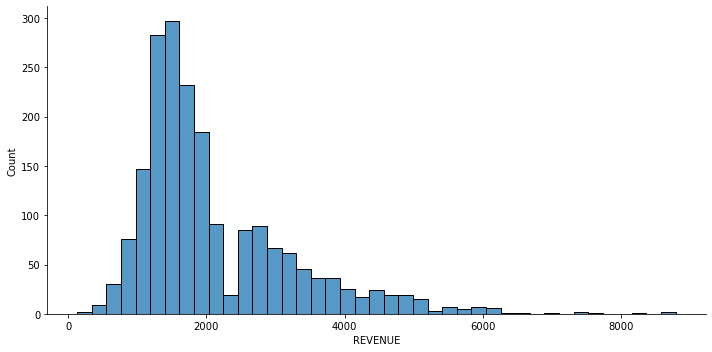

In [4]:
sns.displot(data   = chef,
            x      = 'REVENUE',
            height = 5,
            aspect = 2)


# displaying the histogram
plt.show()

<br>
<strong>Checking how the continous variables above correlates with 'REVENUE'</strong>

In [5]:
# creating a list of continuous features (including REVENUE)
continuous_data = ['REVENUE','TOTAL_MEALS_ORDERED',
                    'UNIQUE_MEALS_PURCH',
                    'CONTACTS_W_CUSTOMER_SERVICE',
                    'AVG_TIME_PER_SITE_VISIT',
                    'AVG_PREP_VID_TIME',
                    'TOTAL_PHOTOS_VIEWED',
                    'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED']


# developing a correlation matrix based on continuous features
chef_corr = chef[continuous_data].corr(method = 'pearson')


# filtering the results to only show correlations with REVENUE
chef_corr.loc[ : , 'REVENUE'].round(decimals = 2).sort_values(ascending = False)

REVENUE                        1.00
AVG_PREP_VID_TIME              0.64
TOTAL_MEALS_ORDERED            0.60
TOTAL_PHOTOS_VIEWED            0.47
MASTER_CLASSES_ATTENDED        0.45
LARGEST_ORDER_SIZE             0.44
AVG_TIME_PER_SITE_VISIT        0.14
CONTACTS_W_CUSTOMER_SERVICE    0.10
UNIQUE_MEALS_PURCH            -0.06
Name: REVENUE, dtype: float64

<br><br>
Transforming continuous with log.

In [6]:
for index, value in chef.iterrows():
    
    if chef.loc[index, 'MASTER_CLASSES_ATTENDED'] == 0:
        chef.loc[index, 'MASTER_CLASSES_ATTENDED'] = 0.00000001
        
    if chef.loc[index, 'CONTACTS_W_CUSTOMER_SERVICE'] == 0:
        chef.loc[index, 'CONTACTS_W_CUSTOMER_SERVICE'] = 0.00000001
        
    if chef.loc[index, 'TOTAL_PHOTOS_VIEWED'] == 0:
        chef.loc[index, 'TOTAL_PHOTOS_VIEWED'] = 0.00000001

In [7]:
chef['log_TOT_MEALS']      = np.log10(chef['TOTAL_MEALS_ORDERED'])
chef['log_UNIQ_MEALS']     = np.log10(chef['UNIQUE_MEALS_PURCH'])
chef['log_CONTACT_CUS']    = np.log10(chef['CONTACTS_W_CUSTOMER_SERVICE'])
chef['log_AVG_T_SITE']     = np.log10(chef['AVG_TIME_PER_SITE_VISIT'])
chef['log_AVG_PREP']       = np.log10(chef['AVG_PREP_VID_TIME'])
chef['log_TOTAL_PHT']      = np.log10(chef['TOTAL_PHOTOS_VIEWED'])
chef['log_MAST_CLASS']     = np.log10(chef['MASTER_CLASSES_ATTENDED'])


<br><br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />


# Feature Engineering

<strong>The following are my y and x variables that are going t be used for the OLS model.</strong> 

<u>y-Varible</u><br>
REVENUE

<br>
<u>X-Variable</u><br>

* TOTAL_MEALS_ORDERED
* UNIQUE_MEALS_PURCH
* CONTACTS_W_CUSTOMER_SERVICE
* AVG_TIME_PER_SITE_VISIT
* AVG_PREP_VID_TIME
* TOTAL_PHOTOS_VIEWED
* MASTER_CLASSES_ATTENDED
* LARGEST_ORDER_SIZE
<br><br>

<strong>I ran a basic OLS lm to see where the model was standing with the current variables.</strong>

In [8]:
# building a base model

# INSTANTIATING a model type
lm_practice = smf.ols(formula = """ REVENUE ~ TOTAL_MEALS_ORDERED  +
                                                  UNIQUE_MEALS_PURCH +
                                                  CONTACTS_W_CUSTOMER_SERVICE  +
                                                  AVG_TIME_PER_SITE_VISIT +
                                                  AVG_PREP_VID_TIME +
                                                  MASTER_CLASSES_ATTENDED +
                                                  TOTAL_PHOTOS_VIEWED +
                                                  LARGEST_ORDER_SIZE""",
                        data = chef)


# telling Python to FIT the data to the blueprint
results = lm_practice.fit()


# printing a summary of the results
#print(results.summary())

## Trend-Based Features

<strong>For this section I started checking variables with missing values which in this case it was 'FAMILY_NAME. I proceed to not fill them given that I will not use this variable. I then plotted a set of <u>scatter plots</u> in order to visualize what variable contained 0s</strong>

In [9]:
# counting the number of zeroes
pht_viewed    = len(chef['TOTAL_PHOTOS_VIEWED'][chef['TOTAL_PHOTOS_VIEWED'] == 0.00000001])
masterclass   = len(chef['MASTER_CLASSES_ATTENDED'][chef['MASTER_CLASSES_ATTENDED'] == 0.00000001])
uniq_meal_pur = len(chef['UNIQUE_MEALS_PURCH'][chef['UNIQUE_MEALS_PURCH'] == 0.00000001])
avr_time_vis  = len(chef['AVG_TIME_PER_SITE_VISIT'][chef['AVG_TIME_PER_SITE_VISIT'] == 0.00000001])
cont_serv     = len(chef['CONTACTS_W_CUSTOMER_SERVICE'][chef['CONTACTS_W_CUSTOMER_SERVICE'] == 0.00000001])



## the table below has been coded for you ##

# printing a table of the results
print(f"""
                 No\t\tYes
               ---------------------
Photo Viewed       | {pht_viewed}\t\t{len(chef) - pht_viewed}
Masterclass        | {masterclass}\t\t{len(chef) - masterclass}
Unique meal purch  | {uniq_meal_pur}\t\t{len(chef) - uniq_meal_pur}
Site Visit Avg     | {avr_time_vis}\t\t{len(chef) - avr_time_vis}
Cust Service.      | {cont_serv}\t\t{len(chef) - cont_serv}
""")



                 No		Yes
               ---------------------
Photo Viewed       | 1140		806
Masterclass        | 932		1014
Unique meal purch  | 0		1946
Site Visit Avg     | 0		1946
Cust Service.      | 0		1946



<strong>Turning TOTAL_PHOTOS_VIEWED and MASTER_CLASSES_ATTENDED in dummy varibles</strong> 

In [10]:
#dummy variables for photo viewed and masterclass 
chef['viewed_photo']   = 0
chef['attended_class'] = 0


# iterating over each original column to
# change values in the new feature columns
for index, value in chef.iterrows():
    
    # TOTAL_PHOTOS_VIEWED 
    if chef.loc[index, 'TOTAL_PHOTOS_VIEWED'] > 0.00000001:
        chef.loc[index, 'viewed_photo'] = 1


    # MASTER_CLASSES_ATTENDED
    if chef.loc[index, 'MASTER_CLASSES_ATTENDED'] > 0.00000001:
        chef.loc[index, 'attended_class'] = 1

In [11]:
chef[['viewed_photo', 'attended_class']].head()

,viewed_photo,attended_class
0,0,0
1,1,0
2,0,0
3,0,0
4,1,1


<br>
Checking the correlation of the new features with revenue.

In [12]:
# developing a small correlation matrix
zeroes_corr = chef.corr()    # .round(decimals = 2)


# checking the correlations of the newly-created variables with REVENUE
zeroes_corr.loc['REVENUE',                                   # Y-variable
               ['viewed_photo', 'attended_class']] \
                .sort_values(ascending = False)

attended_class    0.453022
viewed_photo      0.372072
Name: REVENUE, dtype: float64

<br>

## Working with Interval and Count Data

I proceeded to analyze the interval variables by creating a set of <u>boxplots</u> to visualize the variables linearity and see which ones could need a log transformation. This set of boxplots is not shown in this script.<br><br><br>
Here I have decided to transform <u>CANCELLATIONS_BEFORE_NOON, CANCELLATIONS_AFTER_NOON, EARLY_DELIVERIES, and LATE_DELIVERIES</u> to dummy variables.



In [13]:
#dummy variables for photo viewed and masterclass 
chef['Canc_BEF_NOON']   = 0
chef['Canc_AFT_NOON']   = 0
chef['Early_DEL']       = 0
chef['Late_DEL']        = 0


# iterating over each original column to
# change values in the new feature columns
for index, value in chef.iterrows():
    
    # CANCELLATIONS_BEFORE_NOON 
    if chef.loc[index, 'CANCELLATIONS_BEFORE_NOON'] > 0:
        chef.loc[index, 'Canc_BEF_NOON'] = 1


    # CANCELLATIONS_AFTER_NOON
    if chef.loc[index, 'CANCELLATIONS_AFTER_NOON'] > 0:
        chef.loc[index, 'Canc_AFT_NOON'] = 1
     
    
    # EARLY_DELIVERIES
    if chef.loc[index, 'EARLY_DELIVERIES'] > 0:
        chef.loc[index, 'Early_DEL'] = 1
        
        
    # EARLY_DELIVERIES
    if chef.loc[index, 'LATE_DELIVERIES'] > 0:
        chef.loc[index, 'Late_DEL'] = 1    

<br><br>
Then I changed the 0 values to 0.00000001 for some variables in order to be able to transform them to log. 

In [14]:
# this conversion was just to transform these with log

for index, value in chef.iterrows():
    # WEEKLY_PLAN
    if chef.loc[index, 'WEEKLY_PLAN'] == 0:
        chef.loc[index, 'WEEKLY_PLAN'] = 0.00000001
        

<br>Transforming interval variables with log. 

In [15]:
chef['log_REVENUE'] = np.log10(chef['REVENUE'])
chef['log_PRODUCT_CATG'] = np.log10(chef['PRODUCT_CATEGORIES_VIEWED'])
chef['log_LARGEST_ORDER_SIZE'] = np.log10(chef['LARGEST_ORDER_SIZE'])
chef['log_PC_LOGINS'] = np.log10(chef['PC_LOGINS'])
chef['log_AVG_CLICKS'] = np.log10(chef['AVG_CLICKS_PER_VISIT'])
chef['log_WEEKLY_PLAN'] = np.log10(chef['WEEKLY_PLAN'])

<br>
Changing 0s to 0.00000001 of log transformed varibles to run them on a lm.

In [16]:
for index, value in chef.iterrows():
    
    # log_REVENUE
    if chef.loc[index, 'log_REVENUE'] == 0:
        chef.loc[index, 'log_REVENUE'] = 0.00000001


    # log_PRODUCT_CATG
    if chef.loc[index, 'log_PRODUCT_CATG'] == 0:
        chef.loc[index, 'log_PRODUCT_CATG'] = 0.00000001
        
        
    # log_LARGEST_ORDER_SIZE
    if chef.loc[index, 'log_LARGEST_ORDER_SIZE'] == 0:
        chef.loc[index, 'log_LARGEST_ORDER_SIZE'] = 0.00000001
        
        
    # log_PC_LOGINS
    if chef.loc[index, 'log_PC_LOGINS'] == 0:
        chef.loc[index, 'log_PC_LOGINS'] = 0.00000001
        
        
    # log_AVG_CLICKS
    if chef.loc[index, 'log_AVG_CLICKS'] == 0:
        chef.loc[index, 'log_AVG_CLICKS'] = 0.00000001
        
    
    # log_WEEKLY_PLAN
    if chef.loc[index, 'log_WEEKLY_PLAN'] == 0:
        chef.loc[index, 'log_WEEKLY_PLAN'] = 0.00000001

<br>

## Encoding categorical data

Now I will print the count of observations for the categorical varibles and change the ones that are not dummies yet, to dummies. The variables that will be changed are MEDIAN_MEAL_RATING, PC_LOGINS, and MOBILE_LOGINS. 

In [17]:
# one hot encoding categorical variables
one_hot_rating       = pd.get_dummies(chef['MEDIAN_MEAL_RATING'])


# dropping categorical variables after they've been encoded
#chef = chef.drop('MEDIAN_MEAL_RATING', axis = 1)


# joining codings together
chef = chef.join([one_hot_rating])

In [18]:
chef.columns =['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME', 
               'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 
               'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 
               'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 
               'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 
               'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 
               'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 
               'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 
               'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 
               'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 
               'TOTAL_PHOTOS_VIEWED', 'log_TOT_MEALS', 'log_UNIQ_MEALS', 
               'log_CONTACT_CUS', 'log_AVG_T_SITE', 'log_AVG_PREP', 
               'log_TOTAL_PHT', 'log_MAST_CLASS', 'viewed_photo', 
               'attended_class', 'Canc_BEF_NOON', 'Canc_AFT_NOON', 
               'Early_DEL', 'Late_DEL', 'log_REVENUE', 'log_PRODUCT_CATG', 
               'log_LARGEST_ORDER_SIZE', 'log_PC_LOGINS', 'log_AVG_CLICKS', 
               'log_WEEKLY_PLAN','Meal_Rat_1', 'Meal_Rat_2', 
               'Meal_Rat_3','Meal_Rat_4', 'Meal_Rat_5']

In [19]:
# one hot encoding categorical variables
one_hot_PC       = pd.get_dummies(chef['PC_LOGINS'])


# joining codings together
chef = chef.join([one_hot_PC])

In [20]:
chef.columns =['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME', 
               'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 
               'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 
               'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 
               'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 
               'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 
               'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 
               'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 
               'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 
               'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 
               'TOTAL_PHOTOS_VIEWED', 'log_TOT_MEALS', 'log_UNIQ_MEALS', 
               'log_CONTACT_CUS', 'log_AVG_T_SITE', 'log_AVG_PREP', 
               'log_TOTAL_PHT', 'log_MAST_CLASS', 'viewed_photo', 
               'attended_class', 'Canc_BEF_NOON', 'Canc_AFT_NOON', 
               'Early_DEL', 'Late_DEL', 'log_REVENUE', 'log_PRODUCT_CATG', 
               'log_LARGEST_ORDER_SIZE', 'log_PC_LOGINS', 'log_AVG_CLICKS', 
               'log_WEEKLY_PLAN','Meal_Rat_1', 'Meal_Rat_2', 
               'Meal_Rat_3','Meal_Rat_4', 'Meal_Rat_5','PC_Logins4', 
               'PC_Logins5','PC_Logins6', 'PC_Logins7']

In [21]:
# one hot encoding categorical variables
one_hot_MOB_Logins       = pd.get_dummies(chef['MOBILE_LOGINS'])


# joining codings together
chef = chef.join([one_hot_MOB_Logins])

In [22]:
chef.columns =['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME', 
               'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 
               'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 
               'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 
               'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 
               'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 
               'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 
               'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 
               'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 
               'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 
               'TOTAL_PHOTOS_VIEWED', 'log_TOT_MEALS', 'log_UNIQ_MEALS', 
               'log_CONTACT_CUS', 'log_AVG_T_SITE', 'log_AVG_PREP', 
               'log_TOTAL_PHT', 'log_MAST_CLASS', 'viewed_photo', 
               'attended_class', 'Canc_BEF_NOON', 'Canc_AFT_NOON', 
               'Early_DEL', 'Late_DEL', 'log_REVENUE', 'log_PRODUCT_CATG', 
               'log_LARGEST_ORDER_SIZE', 'log_PC_LOGINS', 'log_AVG_CLICKS', 
               'log_WEEKLY_PLAN','Meal_Rat_1', 'Meal_Rat_2', 
               'Meal_Rat_3','Meal_Rat_4', 'Meal_Rat_5','PC_Logins4', 
               'PC_Logins5','PC_Logins6', 'PC_Logins7','MOBL_Logins0',
               'MOBL_Logins1','MOBL_Logins2','MOBL_Logins3']

### Categorizing emails

In [23]:
# STEP 1: splitting personal emails

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in chef.iterrows():
    
    # splitting email domain at '@'
    split_email = chef.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


# displaying the results
#email_df

In [24]:
# renaming column to concatenate
email_df.columns = ['0' , 'email_domain']


# concatenating personal_email_domain with friends DataFrame
chef = pd.concat([chef, email_df['email_domain']],
                     axis = 1)


# printing value counts of personal_email_domain
#chef.loc[: ,'email_domain'].value_counts()

In [25]:
# email domain types
personal_email_domains = ['@gmail.com','@protonmail.com','@yahoo.com','@msn.com',
                          '@aol.com','@hotmail.com','@live.com','@me.com']
corp_email_domains  = ['@amex.com','@merck.com','@mcdonalds.com','@cocacola.com',
                       '@jnj.com','@apple.com','@nike.com','@ibm.com','@ge.org',
                       '@dupont.com','@chevron.com','@microsoft.com','@exxon.com',
                       '@travelers.com','@unitedhealth.com','@boeing.com','@pg.com',
                       '@mmm.com','@verizon.com','@caterpillar.com','@walmart.com',
                       '@disney.com','@visa.com','@pfizer.com','@jpmorgan.com',
                       '@goldmansacs.com','@unitedtech.com','@cisco.com',
                       '@homedepot.com','@intel.com','@passport.com']


# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in chef['email_domain']:
        if '@' + domain in personal_email_domains:
            placeholder_lst.append('personal')
            
        elif '@' + domain in corp_email_domains:
            placeholder_lst.append('corporate')
            
        else:
            print('Unknown')


# concatenating with original DataFrame
chef['domain_group'] = pd.Series(placeholder_lst)


# checking results
chef['domain_group'].value_counts()

personal     1186
corporate     760
Name: domain_group, dtype: int64

In [26]:
#Transformig email category into dummies
email_groups       = pd.get_dummies(chef['domain_group'])

#dropping domain_group column
chef = chef.drop('domain_group', axis = 1)

# joining codings together
chef = chef.join([email_groups])

<br>

## Building a Base Model 

<br>
I ran the full model with REVENUE as y-variable and then with log_REVENUE and chose to move forward with the significant variables from log_revenue.<br>
Fiting the base model with the most significant variables by choosing those with a p-value > 0.05

In [27]:
# blueprinting a model type
lm_full = smf.ols(formula = """ log_REVENUE ~ CROSS_SELL_SUCCESS +
                                                TOTAL_MEALS_ORDERED +
                                                UNIQUE_MEALS_PURCH +
                                                CONTACTS_W_CUSTOMER_SERVICE +
                                                PRODUCT_CATEGORIES_VIEWED +
                                                AVG_TIME_PER_SITE_VISIT +
                                                MOBILE_NUMBER +
                                                CANCELLATIONS_BEFORE_NOON +
                                                CANCELLATIONS_AFTER_NOON +
                                                TASTES_AND_PREFERENCES +
                                                PC_LOGINS +
                                                MOBILE_LOGINS +
                                                WEEKLY_PLAN +
                                                EARLY_DELIVERIES +
                                                LATE_DELIVERIES +
                                                PACKAGE_LOCKER +
                                                REFRIGERATED_LOCKER +
                                                AVG_PREP_VID_TIME +
                                                LARGEST_ORDER_SIZE +
                                                MASTER_CLASSES_ATTENDED +
                                                MEDIAN_MEAL_RATING +
                                                AVG_CLICKS_PER_VISIT +
                                                TOTAL_PHOTOS_VIEWED +
                                                log_TOT_MEALS +
                                                log_UNIQ_MEALS +
                                                log_CONTACT_CUS +
                                                log_AVG_T_SITE +
                                                log_AVG_PREP +
                                                log_TOTAL_PHT +
                                                log_MAST_CLASS +
                                                viewed_photo +
                                                attended_class +
                                                Canc_BEF_NOON +
                                                Canc_AFT_NOON +
                                                Early_DEL +
                                                Late_DEL +
                                                log_PRODUCT_CATG +
                                                log_LARGEST_ORDER_SIZE +
                                                log_PC_LOGINS +
                                                log_AVG_CLICKS +
                                                log_WEEKLY_PLAN +
                                                Meal_Rat_1 +
                                                Meal_Rat_2 +
                                                Meal_Rat_3 +
                                                Meal_Rat_4 +
                                                Meal_Rat_5 +
                                                PC_Logins4 +
                                                PC_Logins5 +
                                                PC_Logins6 +
                                                PC_Logins7 +
                                                MOBL_Logins0 +
                                                MOBL_Logins1 +
                                                MOBL_Logins2 +
                                                MOBL_Logins3 +
                                                corporate +
                                                personal 
                                            """,
                                            data = chef)


# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_REVENUE   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     150.1
Date:                Tue, 09 Feb 2021   Prob (F-statistic):               0.00
Time:                        23:57:43   Log-Likelihood:                 1785.3
No. Observations:                1946   AIC:                            -3473.
Df Residuals:                    1897   BIC:                            -3199.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       1.2886      0.334      3.855      0.000       0.633       1.944
CROSS_SELL_SUCCESS             -0.0144      0.005     -2.865      0.004      -0.024      -0.005
TOTAL_MEALS_ORDERED            -0.0009      0.000     -8.106      0.000      -0.001      -0.001
UNIQUE_MEALS_PURCH              0.0537      0.003     18.732      0.000       0.048       0.059
CONTACTS_W_CUSTOMER_SERVICE    -0.0025      0.006     -0.436      0.663      -0.013       0.009
PRODUCT_CATEGORIES_VIEWED       0.0094      0.003      3.649      0.000       0.004       0.014
AVG_TIME_PER_SITE_VISIT      1.222e-05   6.12e-05      0.200      0.842      -0.000       0.000
MOBILE_NUMBER                   0.0081      0.007      1.166      0.244      -0.005       0.022
CANCELLATIONS_BEFORE_NOON       0.0008      0.002      0.420      0.675      -0.003       0.005
CANCELLATIONS_AFTER_NOON        0.0075      0.015      0.496      0.620      -0.022       0.037
TASTES_AND_PREFERENCES          0.0089      0.005      1.774      0.076      -0.001       0.019
PC_LOGINS                       1.1467      0.298      3.843      0.000       0.562       1.732
MOBILE_LOGINS                   0.3214      0.084      3.818      0.000       0.156       0.486
WEEKLY_PLAN                     0.0002      0.000      0.961      0.337      -0.000       0.001
EARLY_DELIVERIES               -0.0015      0.002     -0.970      0.332      -0.005       0.002
LATE_DELIVERIES                -0.0003      0.001     -0.346      0.729      -0.002       0.002
PACKAGE_LOCKER                 -0.0069      0.005     -1.289      0.197      -0.017       0.004
REFRIGERATED_LOCKER            -0.0071      0.008     -0.878      0.380      -0.023       0.009
AVG_PREP_VID_TIME               0.0007      0.000      2.926      0.003       0.000       0.001
LARGEST_ORDER_SIZE             -0.0262      0.007     -3.947      0.000      -0.039      -0.013
MASTER_CLASSES_ATTENDED        -0.3038      0.104     -2.925      0.003      -0.508      -0.100
MEDIAN_MEAL_RATING              0.3789      0.091      4.161      0.000       0.200       0.558
AVG_CLICKS_PER_VISIT            0.0143      0.011      1.324      0.186      -0.007       0.036
TOTAL_PHOTOS_VIEWED         -6.366e-06   3.21e-05     -0.199      0.843   -6.92e-05    5.65e-05
log_TOT_MEALS                   0.4116      0.024     17.227      0.000       0.365       0.458
log_UNIQ_MEALS                 -0.6250      0.027    -23.276      0.000      -0.678      -0.572
log_CONTACT_CUS                 0.1924      0.081      2.368      0.018       0.033       0.352
log_AVG_T_SITE                  0.0066      0.019      0.352      0.725      -0.030       0.043
log_AVG_PREP                    0.3304      0.089      3.697      0.000       0.155       0.506
log_TOTAL_P

<br><br>
After running the full regression I choose the variables that had a p-value < 0.05. I also then ran a correlation of those variable with log_REVENUE to use this with the p-value variables to choose for my lm.fit. Correlation code is here but won't be ran for time matters.

In [28]:
# blueprinting a model type
lm_fit = smf.ols(formula = """ log_REVENUE ~ CROSS_SELL_SUCCESS + 
                                            UNIQUE_MEALS_PURCH +
                                            PRODUCT_CATEGORIES_VIEWED +
                                            MOBILE_LOGINS +
                                            LARGEST_ORDER_SIZE +
                                            MEDIAN_MEAL_RATING +
                                            log_TOT_MEALS +
                                            log_CONTACT_CUS +
                                            attended_class +
                                            log_AVG_PREP +
                                            log_MAST_CLASS +
                                            attended_class +
                                            TOTAL_PHOTOS_VIEWED +
                                            viewed_photo + 
                                            log_AVG_T_SITE +
                                            Meal_Rat_4 + 
                                            MOBILE_NUMBER +
                                            Canc_BEF_NOON +
                                            MOBL_Logins0 +
                                            MOBL_Logins1 +
                                            MOBL_Logins2 +
                                            MOBL_Logins3 +
                                            corporate +
                                            personal +
                                            Early_DEL
                                            """,
                                data = chef)


# telling Python to run the data through the blueprint
results_fit = lm_fit.fit()


# printing the results
results_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_REVENUE   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     235.3
Date:                Tue, 09 Feb 2021   Prob (F-statistic):               0.00
Time:                        23:57:43   Log-Likelihood:                 1497.2
No. Observations:                1946   AIC:                            -2950.
Df Residuals:                    1924   BIC:                            -2828.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     1.1153      0.129      8.632      0.000       0.862       1.369
CROSS_SELL_SUCCESS           -0.0136      0.006     -2.404      0.016      -0.025      -0.003
UNIQUE_MEALS_PURCH           -0.0106      0.001    -10.089      0.000      -0.013      -0.009
PRODUCT_CATEGORIES_VIEWED     0.0012      0.001      1.403      0.161      -0.000       0.003
MOBILE_LOGINS                 0.2788      0.034      8.206      0.000       0.212       0.345
LARGEST_ORDER_SIZE           -0.0200      0.003     -7.008      0.000      -0.026      -0.014
MEDIAN_MEAL_RATING            0.0424      0.005      8.352      0.000       0.032       0.052
log_TOT_MEALS                 0.2455      0.011     21.752      0.000       0.223       0.268
log_CONTACT_CUS               0.0832      0.019      4.321      0.000       0.045       0.121
attended_class               -0.7857      0.259     -3.033      0.002      -1.294      -0.278
log_AVG_PREP                  0.6126      0.037     16.341      0.000       0.539       0.686
log_MAST_CLASS                0.1025      0.032      3.182      0.001       0.039       0.166
TOTAL_PHOTOS_VIEWED        2.624e-05   2.11e-05      1.244      0.214   -1.51e-05    6.76e-05
viewed_photo                  0.0193      0.007      2.585      0.010       0.005       0.034
log_AVG_T_SITE               -0.0702      0.013     -5.444      0.000      -0.095      -0.045
Meal_Rat_4                    0.1002      0.010      9.617      0.000       0.080       0.121
MOBILE_NUMBER                 0.0119      0.008      1.513      0.131      -0.004       0.027
Canc_BEF_NOON                 0.0046      0.005      0.835      0.404      -0.006       0.015
MOBL_Logins0                  0.6917      0.082      8.451      0.000       0.531       0.852
MOBL_Logins1                  0.4249      0.050      8.574      0.000       0.328       0.522
MOBL_Logins2                  0.1420      0.021      6.891      0.000       0.102       0.182
MOBL_Logins3                 -0.1434      0.020     -7.001      0.000      -0.184      -0.103
corporate                     0.5581      0.065      8.630      0.000       0.431       0.685
personal                      0.5572      0.065      8.619      0.000       0.430       0.684
Early_DEL                    -0.0059      0.005     -1.118      0.264      -0.016       0.004
==============================================================================
Omnibus:                      122.728   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              485.336
Skew:                          -0.154   Prob(JB):                    4.08e-106
Kurtosis:                       5.427   Cond. No.                     1.49e+18
========================================================

<br><br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

# LINEAR MODELING 

<br>
Preparing my train and test sets

In [29]:
# preparing explanatory variable data
chef_data   = chef.drop(['REVENUE','log_REVENUE','NAME','EMAIL','FIRST_NAME',
                           'FAMILY_NAME','email_domain'],
                               axis = 1)


# preparing response variables
chef_target = chef.loc[ : , 'REVENUE']
log_chef_target = chef.loc[ : , 'log_REVENUE']


# preparing training and testing sets (all letters are lowercase)
x_train, x_test, y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            test_size = 0.25,
            random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (1459, 56)
y-side: (1459,)


Testing Data
------------
X-side: (487, 56)
y-side: (487,)



<br>
Declaring x-variables

In [30]:
# declaring set of x-variables
x_variables = ['CROSS_SELL_SUCCESS','UNIQUE_MEALS_PURCH','PRODUCT_CATEGORIES_VIEWED',
               'MOBILE_LOGINS','LARGEST_ORDER_SIZE','MEDIAN_MEAL_RATING',
               'log_TOT_MEALS','log_CONTACT_CUS','attended_class',
               'log_AVG_PREP','log_MAST_CLASS','attended_class',
               'TOTAL_PHOTOS_VIEWED','viewed_photo','log_AVG_T_SITE',
               'Meal_Rat_4','MOBILE_NUMBER','Canc_BEF_NOON','MOBL_Logins0',
               'MOBL_Logins1','MOBL_Logins2','MOBL_Logins3','corporate',
               'personal','Early_DEL']


# looping to make x-variables suitable for statsmodels
#for val in x_variables:
    #print(f"{val} +")

In [31]:
# merging X_train and y_train so that they can be used in statsmodels
chef_train = pd.concat([x_train, y_train], axis = 1)


# Step 1: build a model
lm_best = smf.ols(formula =  """log_REVENUE ~ CROSS_SELL_SUCCESS +
                                                UNIQUE_MEALS_PURCH +
                                                PRODUCT_CATEGORIES_VIEWED +
                                                MOBILE_LOGINS +
                                                LARGEST_ORDER_SIZE +
                                                MEDIAN_MEAL_RATING +
                                                log_TOT_MEALS +
                                                log_CONTACT_CUS +
                                                attended_class +
                                                log_AVG_PREP +
                                                log_MAST_CLASS +
                                                attended_class +
                                                TOTAL_PHOTOS_VIEWED +
                                                viewed_photo +
                                                log_AVG_T_SITE +
                                                Meal_Rat_4 +
                                                MOBILE_NUMBER +
                                                Canc_BEF_NOON +
                                                MOBL_Logins0 +
                                                MOBL_Logins1 +
                                                MOBL_Logins2 +
                                                MOBL_Logins3 +
                                                corporate +
                                                personal +
                                                Early_DEL  """,
                                                data = chef)


# Step 2: fit the model based on the data
results = lm_best.fit()



# Step 3: analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            log_REVENUE   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     235.3
Date:                Tue, 09 Feb 2021   Prob (F-statistic):               0.00
Time:                        23:57:43   Log-Likelihood:                 1497.2
No. Observations:                1946   AIC:                            -2950.
Df Residuals:                    1924   BIC:                            -2828.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

<br>
<strong>Applying OLS Model</strong>

In [32]:
# applying model in scikit-learn

# Preparing a DataFrame based the the analysis above
ols_data   = chef.loc[ : , x_variables]


# Preparing the target variable
log_chef_target = chef.loc[ : , 'log_REVENUE']


###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            chef_data,     # x-variables
            log_chef_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            log_chef_target,   # y-variable
            test_size = 0.25,
            random_state = 219)

In [33]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))
print('OLS Testing Score  :', lr.score(x_test_OLS, y_test_OLS).round(4))


# saving scoring data for future use
lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4) # using R-square
lr_test_score  = lr.score(x_test_OLS, y_test_OLS).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.717
OLS Testing Score  : 0.7228
OLS Train-Test Gap : 0.0058


In [34]:
# zipping each feature name to its coefficient
lr_model_values = zip(chef_data[x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', 2.38)
('CROSS_SELL_SUCCESS', -0.02)
('UNIQUE_MEALS_PURCH', -0.01)
('PRODUCT_CATEGORIES_VIEWED', 0.0)
('MOBILE_LOGINS', -0.02)
('LARGEST_ORDER_SIZE', -0.02)
('MEDIAN_MEAL_RATING', 0.04)
('log_TOT_MEALS', 0.24)
('log_CONTACT_CUS', 0.07)
('attended_class', -0.37)
('log_AVG_PREP', 0.61)
('log_MAST_CLASS', 0.1)
('attended_class', -0.37)
('TOTAL_PHOTOS_VIEWED', 0.0)
('viewed_photo', 0.02)
('log_AVG_T_SITE', -0.07)
('Meal_Rat_4', 0.09)
('MOBILE_NUMBER', 0.01)
('Canc_BEF_NOON', 0.01)
('MOBL_Logins0', 0.0)
('MOBL_Logins1', -0.0)
('MOBL_Logins2', 0.01)
('MOBL_Logins3', -0.01)
('corporate', -0.0)
('personal', 0.0)
('Early_DEL', -0.01)


<br><br>
<strong>Lasso Model</strong>

In [35]:
import sklearn.linear_model

In [36]:
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha     = 1.0) # default shrinkage
                                          # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_FULL)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_FULL, y_train_FULL).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_FULL, y_test_FULL).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_FULL, y_train_FULL).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_FULL, y_test_FULL).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.5231
Lasso Testing Score  : 0.5565
Lasso Train-Test Gap : 0.0334


In [37]:
# zipping each feature name to its coefficient
lasso_model_values = zip(chef_data.columns, lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 2.95)
('CROSS_SELL_SUCCESS', -0.0)
('TOTAL_MEALS_ORDERED', 0.0)
('UNIQUE_MEALS_PURCH', -0.0)
('CONTACTS_W_CUSTOMER_SERVICE', -0.0)
('PRODUCT_CATEGORIES_VIEWED', 0.0)
('AVG_TIME_PER_SITE_VISIT', -0.0)
('MOBILE_NUMBER', 0.0)
('CANCELLATIONS_BEFORE_NOON', 0.0)
('CANCELLATIONS_AFTER_NOON', -0.0)
('TASTES_AND_PREFERENCES', 0.0)
('PC_LOGINS', -0.0)
('MOBILE_LOGINS', -0.0)
('WEEKLY_PLAN', 0.0)
('EARLY_DELIVERIES', -0.0)
('LATE_DELIVERIES', -0.0)
('PACKAGE_LOCKER', -0.0)
('REFRIGERATED_LOCKER', -0.0)
('AVG_PREP_VID_TIME', 0.0)
('LARGEST_ORDER_SIZE', 0.0)
('MASTER_CLASSES_ATTENDED', 0.0)
('MEDIAN_MEAL_RATING', 0.0)
('AVG_CLICKS_PER_VISIT', -0.0)
('TOTAL_PHOTOS_VIEWED', 0.0)
('log_TOT_MEALS', 0.0)
('log_UNIQ_MEALS', -0.0)
('log_CONTACT_CUS', -0.0)
('log_AVG_T_SITE', -0.0)
('log_AVG_PREP', 0.0)
('log_TOTAL_PHT', 0.0)
('log_MAST_CLASS', 0.0)
('viewed_photo', 0.0)
('attended_class', 0.0)
('Canc_BEF_NOON', 0.0)
('Canc_AFT_NOON', -0.0)
('Early_DEL', 0.0)
('Late_DEL', -0.0)
('log_PRODUCT

<br><br>
<strong>ADR Model</strong>

In [38]:
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression(normalize  = False)


# FITTING the training data
ard_fit = ard_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_FULL)


print('Training Score:', ard_model.score(x_train_FULL, y_train_FULL).round(4))
print('Testing Score :',  ard_model.score(x_test_FULL, y_test_FULL).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_FULL, y_train_FULL).round(4)
ard_test_score  = ard_model.score(x_test_FULL, y_test_FULL).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.7695
Testing Score : 0.7729
ARD Train-Test Gap : 0.0034


In [39]:
# zipping each feature name to its coefficient
ard_model_values = zip(chef_data.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
#for val in ard_model_values:
    #ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 1.39)


## Comparing Results

In [40]:
# comparing results

print(f"""
Model      Train Score      Test Score
-----      -----------      ----------
OLS        {lr_train_score}            {lr_test_score}
Lasso      {lasso_train_score}           {lasso_test_score}
ARD        {ard_train_score}           {ard_test_score}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD'],
           
    'Training' : [lr_train_score, lasso_train_score,
                                   ard_train_score],
           
    'Testing'  : [lr_test_score, lasso_test_score,
                                   ard_test_score],
                    
    'Train-Test Gap' : [lr_test_gap, lasso_test_gap,
                                        ard_test_gap],
                    
    'Model Size' : [len(lr_model_lst), len(lasso_model_lst),
                                    len(ard_model_lst)],
                    
    'Model' : [lr_model_lst, lasso_model_lst, ard_model_lst]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
#model_performance.to_excel('./model_results/linear_model_performance.xlsx',
                           #index = False)


Model      Train Score      Test Score
-----      -----------      ----------
OLS        0.717            0.7228
Lasso      0.5231           0.5565
ARD        0.7695           0.7729



### Test Results and Chosen Model


<strong> Preferred Model: ARD </strong>

In [41]:
# printing results the final model in one single table

# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD', 'Preferred Model:', 'ARD'],
           
    'Training Score' : [lr_train_score, lasso_train_score,
                                   ard_train_score," ",ard_train_score ],
           
    'Testing Score'  : [lr_test_score, lasso_test_score,
                                   ard_test_score, " ", ard_test_score],
                    
    'Score Gap' : [lr_test_gap, lasso_test_gap,
                                        ard_test_gap, " ", ard_test_gap],
                    
    'Model Size' : [len(lr_model_lst), len(lasso_model_lst),
                                    len(ard_model_lst), " ",len(ard_model_lst)], 
                    
    'Model' : [lr_model_lst, lasso_model_lst, ard_model_lst, " ", ard_model_lst]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)

model_performance

,Model Type,Training Score,Testing Score,Score Gap,Model Size,Model
0,OLS,0.717,0.7228,0.0058,26,"[(intercept, 2.38), (CROSS_SELL_SUCCESS, -0.02..."
1,Lasso,0.5231,0.5565,0.0334,57,"[(intercept, 2.95), (CROSS_SELL_SUCCESS, -0.0)..."
2,ARD,0.7695,0.7729,0.0034,1,"[(intercept, 1.39)]"
3,Preferred Model:,,,,,
4,ARD,0.7695,0.7729,0.0034,1,"[(intercept, 1.39)]"
